In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploring Data

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'São {len(numeric_features)} variáveis numericas. {numeric_features}')
print(f'São {len(categorical_features)} variáveis categoricas. {categorical_features}')

São 3 variáveis numericas. ['SeniorCitizen', 'tenure', 'MonthlyCharges']
São 18 variáveis categoricas. ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-------------------')

customerID
3186-AJIEK    0.014198
7590-VHVEG    0.014198
5575-GNVDE    0.014198
8775-CEBBJ    0.014198
2823-LKABH    0.014198
                ...   
6713-OKOMC    0.014198
1452-KIOVK    0.014198
9305-CDSKC    0.014198
9237-HQITU    0.014198
7795-CFOCW    0.014198
Name: proportion, Length: 7043, dtype: float64
-------------------
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
-------------------
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
-------------------
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
-------------------
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
-------------------
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
-------------------
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [10]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
idx_remove = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
df.drop(index=idx_remove, inplace=True)

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'São {len(numeric_features)} variáveis numericas. {numeric_features}')
print(f'São {len(categorical_features)} variáveis categoricas. {categorical_features}')

São 4 variáveis numericas. ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
São 17 variáveis categoricas. ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Univariate Analysis

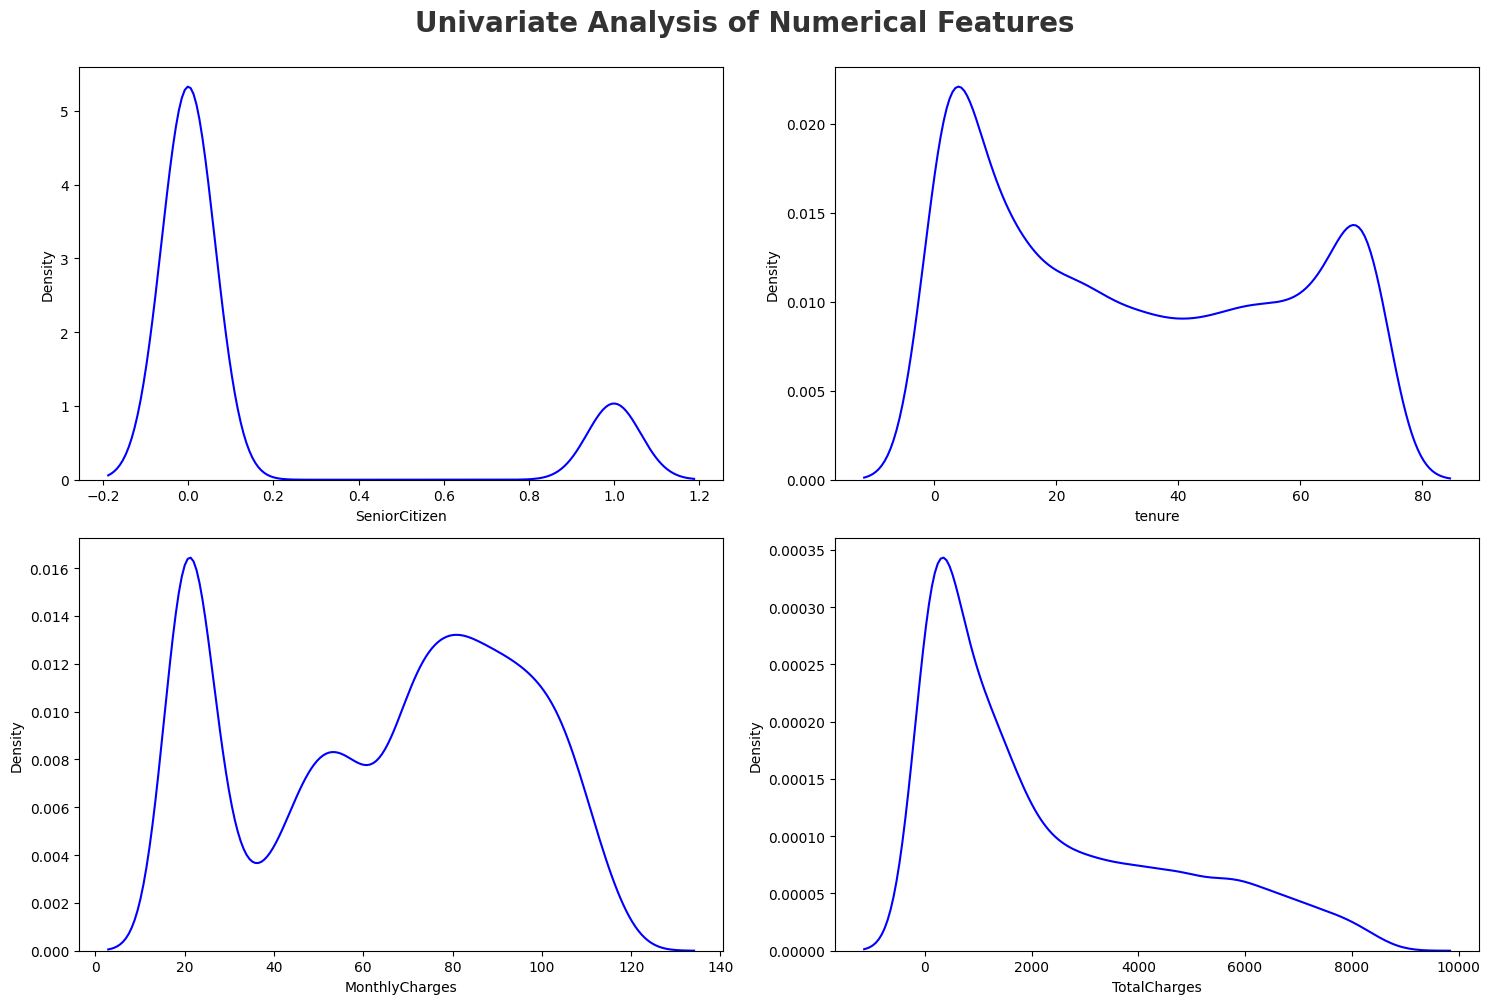

In [14]:
# Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',
                                                          alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

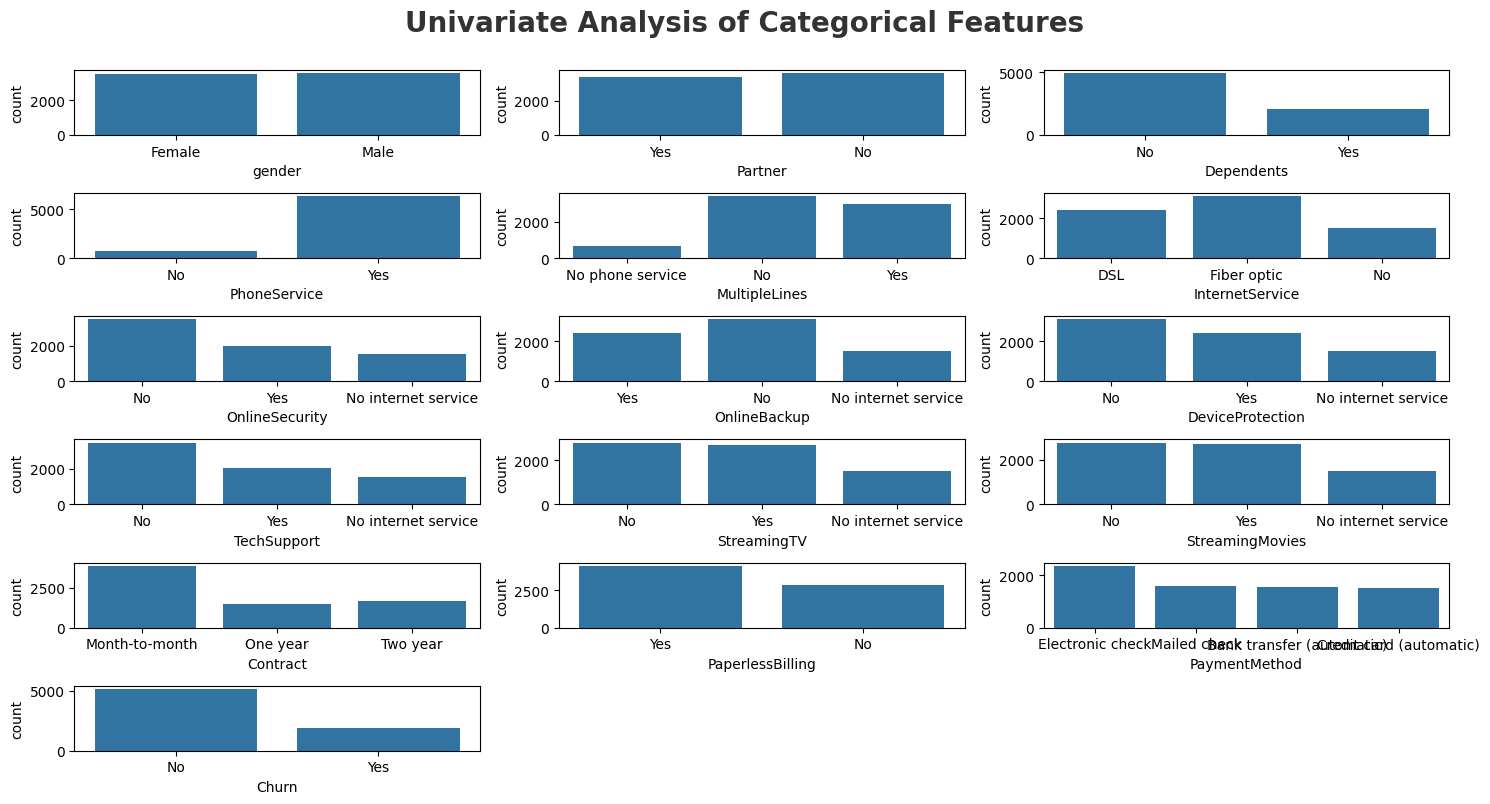

In [15]:
# Categorical Features
categorical_features.remove('customerID')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',
                                                            alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

### Multivariate Analysis

In [16]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>25]

print(f'São {len(discrete_features)} variáveis discretas. {discrete_features}')
print(f'São {len(continuous_features)} variáveis continuas. {continuous_features}')

São 1 variáveis discretas. ['SeniorCitizen']
São 3 variáveis continuas. ['tenure', 'MonthlyCharges', 'TotalCharges']


#### Check Multicollinearity in Numerical Features

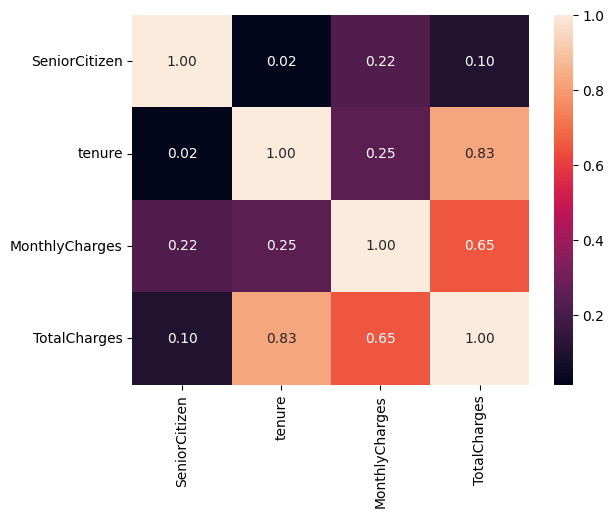

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f');

#### Check Multicollinearity in Categorical Features

In [18]:
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypotesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypotesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypotesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


Report

- `gender` e `PhoneService` falharam ao rejeitar a Hipotese Nula isso significa que essas variáveis não tem correlação com a variável Churn.

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

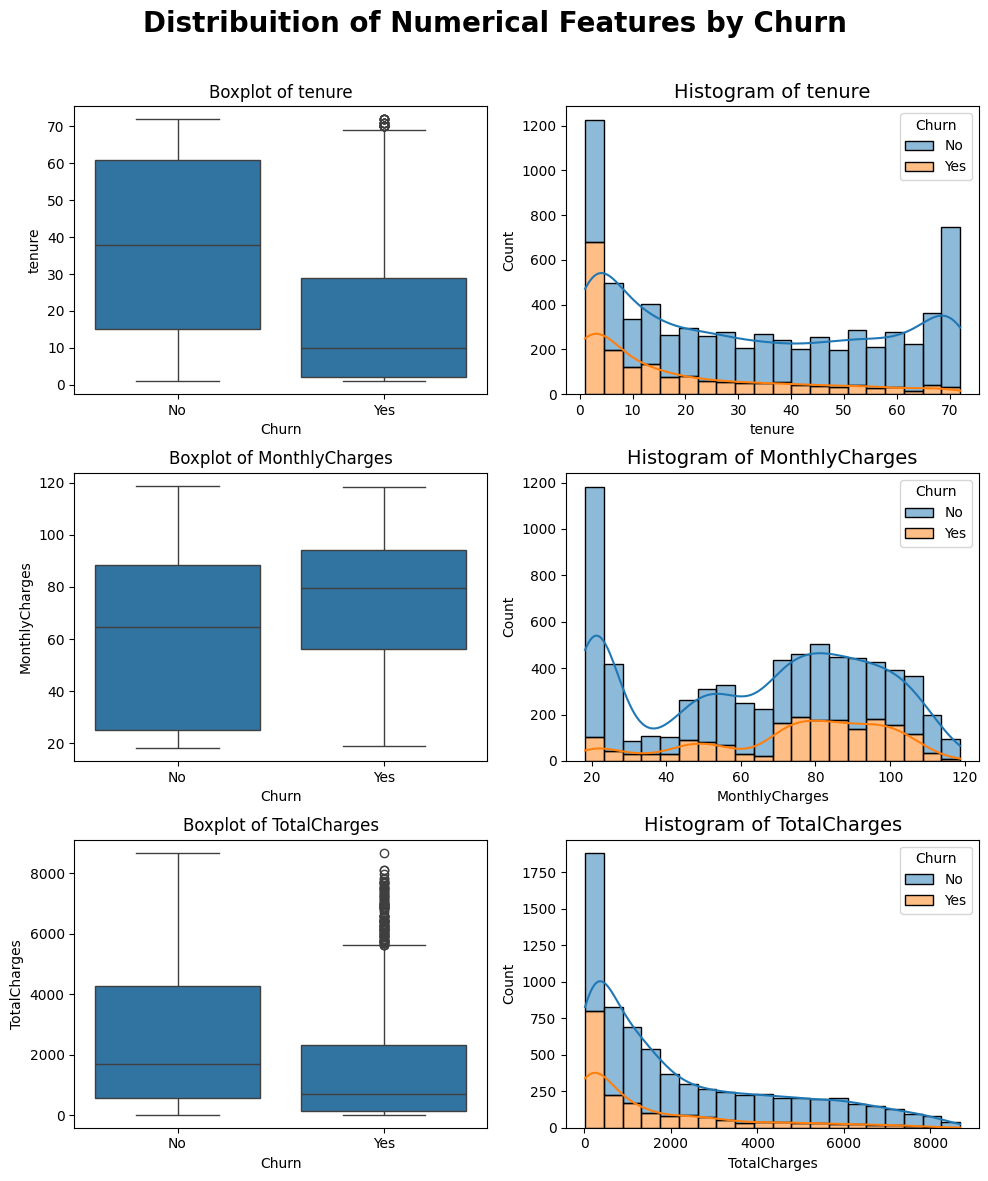

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Distribuition of Numerical Features by Churn', fontsize=20, fontweight='bold')

for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x='Churn', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, multiple='stack', ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

## Visualization

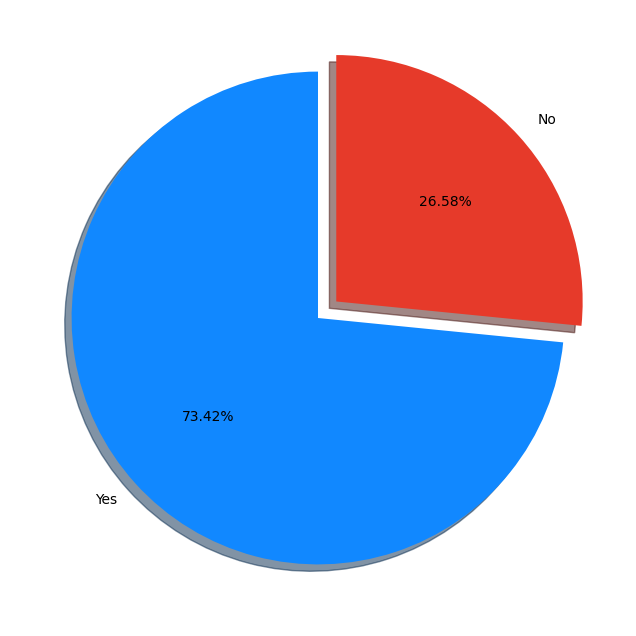

In [23]:
# Visualize the Target Feature
percentage = df.Churn.value_counts(normalize=True)*100
labels = ['Yes', 'No']

fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode,
       shadow=True, colors=colors)
plt.show()

In [25]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
InternetService Churn            
DSL             No      81.001656
                Yes     18.998344
Fiber optic     No      58.107235
                Yes     41.892765
No              No      92.565789
                Yes      7.434211

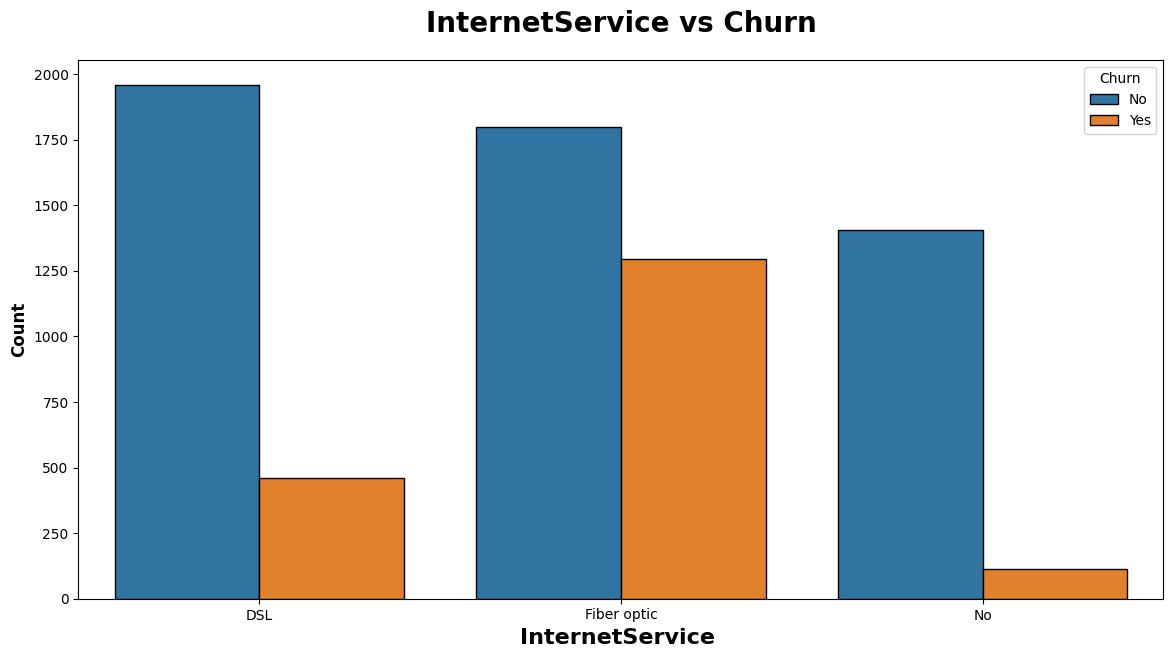

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="InternetService",hue="Churn", data=df, ec = "black")
plt.title("InternetService vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("InternetService ", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

In [27]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
Contract       Churn            
Month-to-month No      57.290323
               Yes     42.709677
One year       No      88.722826
               Yes     11.277174
Two year       No      97.151335
               Yes      2.848665

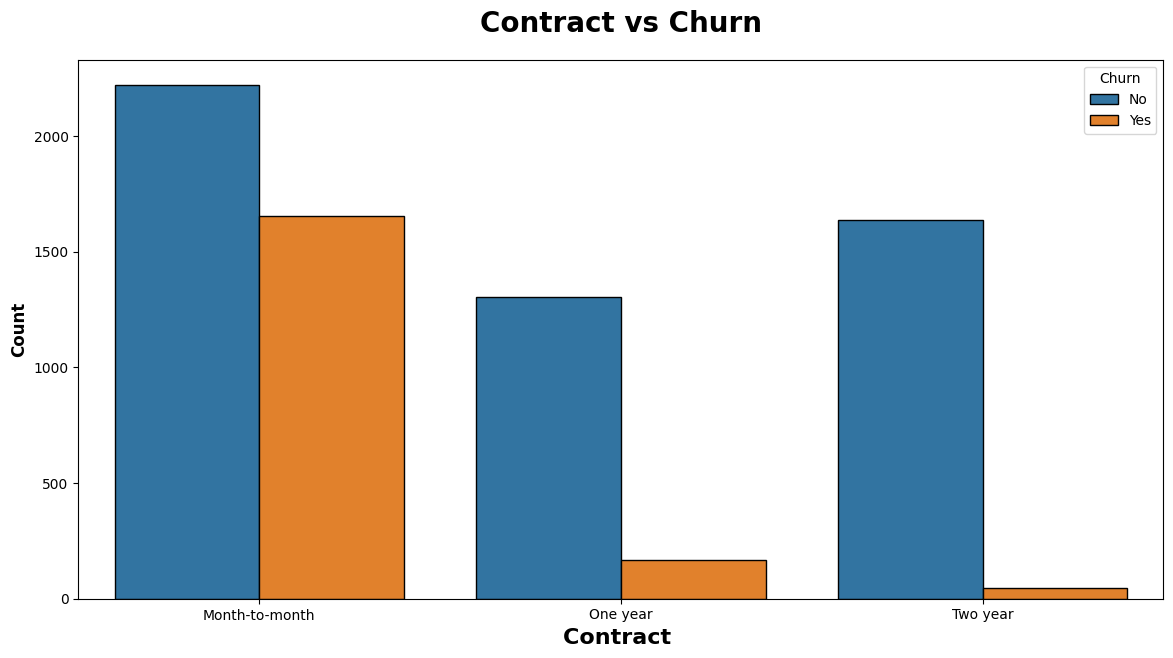

In [28]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Contract",hue="Churn", data=df, ec = "black")
plt.title("Contract vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Contract ", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()